# Proyecto Modelos I - UdeA
## Primera Entrega

En este notebook se realiza una exploración inicial de los datos de la competencia Pruebas Saber Pro Colombia, definida para el proyecto del curso "Modelos y simulación de Sistemas I" de la UdeA.

El objetivo es verificar que el archivo de entrenamiento (train.csv) puede cargarse correctamente y observar algunas de sus características principales.

En particular, se hará:

*   La carga del dataset de entrenamiento.
*   Una inspección de la estructura de los datos (número de filas, columnas y tipos de variables).
*   Un análisis descriptivo básico de algunas variables.
*   Visualizaciones simples para entender la distribución de los datos.

Esta exploración no busca ser exhaustiva, sino demostrar que se cuenta con las herramientas para cargar, inspeccionar y comprender la información inicial antes de aplicar modelos de aprendizaje automático.

# Antes de empezar
Es necesario importar y descargar los archivos requeridos desde la plataforma Kaggle. Para ello, se cargan primero las librerías necesarias en el notebook y, posteriormente, se descarga el archivo comprimido (.zip) que contiene el dataset principal (train.csv), el cual será utilizado en el proceso de exploración.

In [79]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.01GB/s]


## Descomprimimos el archivo .zip

In [80]:
# Comando de linux para descomprimir sin mostrar nada en pantalla
!unzip udea*.zip > /dev/null

En este paso se visualiza información básica de los archivos .csv descomprimidos, como la cantidad de líneas (filas de datos), el número de palabras y el total de caracteres presentes en cada archivo.

In [81]:
# Comando de linux para contar por defecto lineas, palabras y caracteres) de los archivos .csv
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## Cargamos los datos a analizar en un dataframe

In [82]:
# Cargar datos
df = pd.read_csv("train.csv")

## Explorando los datos
Iniciamos mostrando el total de registros disponibles en el dataset y, a continuación, se presentan las primeras filas de los datos en bruto, con el fin de tener una visión preliminar de su estructura y contenido.

In [83]:
# Número total de filas
print("Total de registros:", len(df))

# Mostrar primeras 10 filas
print("Primeras filas del dataset:")
display(df.head(10))

Total de registros: 692500
Primeras filas del dataset:


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


En esta sección se presenta una visión general del dataset, donde se incluyen los índices, los nombres de las columnas, la cantidad de valores no nulos por cada variable y el tipo de dato correspondiente a cada columna.

In [84]:
# Info del DataFrame
print("Información general del dataset: \n")
df.info()

Información general del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO  

En este apartado se presenta un resumen detallado del dataset, en el que se incluyen diferentes aspectos relevantes de los datos. Entre ellos se encuentra la cantidad de valores por columna, así como estadísticos descriptivos como la media, la desviación estándar, el valor mínimo, el valor máximo y los cuartiles.
Adicionalmente, se muestra información sobre las variables categóricas, destacando el número de categorías presentes y la categoría más frecuente (por ejemplo, el programa académico con mayor número de registros).

In [85]:
# Estadísticas descriptivas
df.describe(include="all")

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500,692500,686213,661643,660363,665871,669322,652727,...,692500,686002,654397,665871,668836,692500,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,NaN,948,31,8,5,7,2,12,2,...,2,2,2,2,12,4,NaN,NaN,NaN,NaN
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,NaN,NaN,NaN,NaN
freq,NaN,NaN,53244,282159,204048,249352,232671,592514,128289,563390,...,692466,382201,597670,592514,141744,175619,NaN,NaN,NaN,NaN
mean,494606.130576,20198.366679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.314000,0.309000,0.293000,0.303000


Ahora miramos el conteo de las categorías del rendimiento (bajo , medio-bajo, medio-alto, alto), notamos que son muy parejos los números

Distribución de RENDIMIENTO_GLOBAL:

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


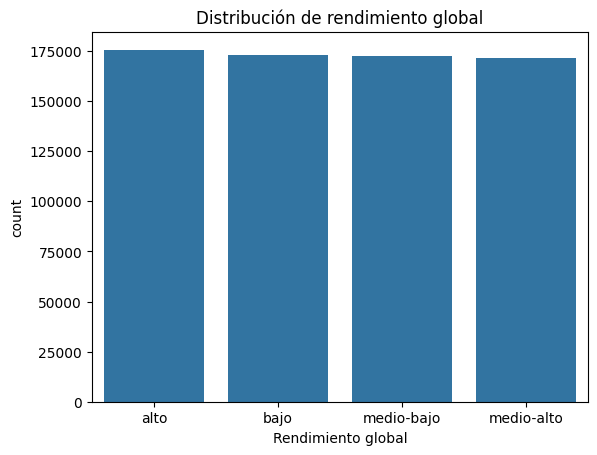

In [86]:
# Distribución de rendimiento
print("Distribución de RENDIMIENTO_GLOBAL:\n")
print(df["RENDIMIENTO_GLOBAL"].value_counts())

sns.countplot(data=df, x="RENDIMIENTO_GLOBAL", order=df["RENDIMIENTO_GLOBAL"].value_counts().index).set_xlabel("Rendimiento global")
plt.title("Distribución de rendimiento global")
plt.show()


Ahora exploramos la cantidad de estudiantes registrados por departamento.

Cantidad de estudiantes por departamento:

E_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


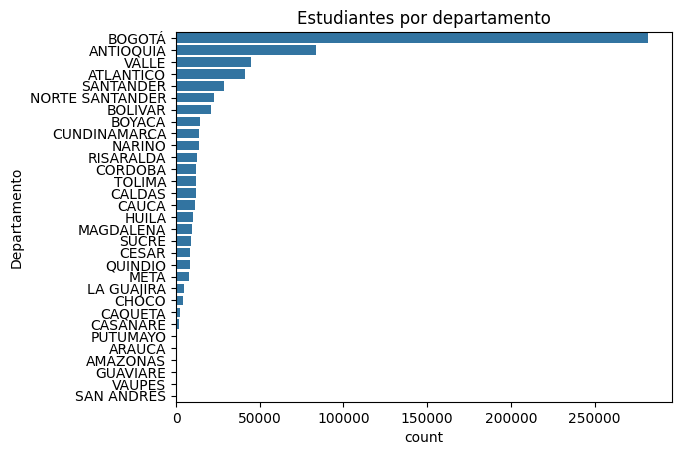

In [87]:
# Exploración por departamento
print("Cantidad de estudiantes por departamento:\n")
print(df["E_PRGM_DEPARTAMENTO"].value_counts())

sns.countplot(data=df, y="E_PRGM_DEPARTAMENTO", order=df["E_PRGM_DEPARTAMENTO"].value_counts().index).set_ylabel("Departamento")
plt.title("Estudiantes por departamento")
plt.show()


Ahora exploramos la cantidad de estudiantes por estrato socioeconómico.

Cantidad de estudiantes por estrato de vivienda:

F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


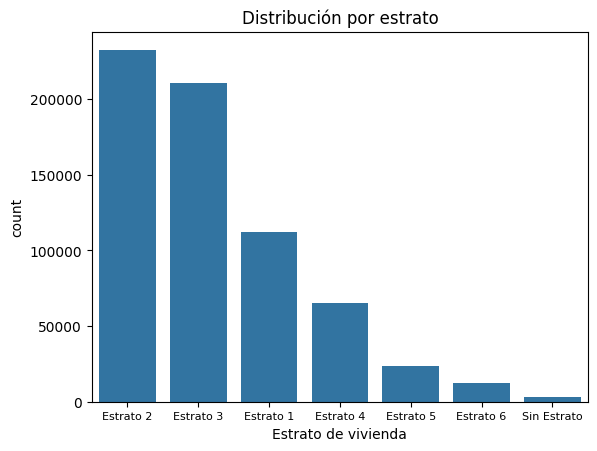

In [88]:
# Exploración por estrato
print("Cantidad de estudiantes por estrato de vivienda:\n")
print(df["F_ESTRATOVIVIENDA"].value_counts())

sns.countplot(data=df, x="F_ESTRATOVIVIENDA", order=df["F_ESTRATOVIVIENDA"].value_counts().index).set_xlabel("Estrato de vivienda")
plt.xticks(fontsize=8)
plt.title("Distribución por estrato")
plt.show()


Miramos la cantidad de estudiantes que trabajan y los que no, así como las horas trabajadas semanalmente.

Cantidad de estudiantes por horas trabajadas en semana:

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


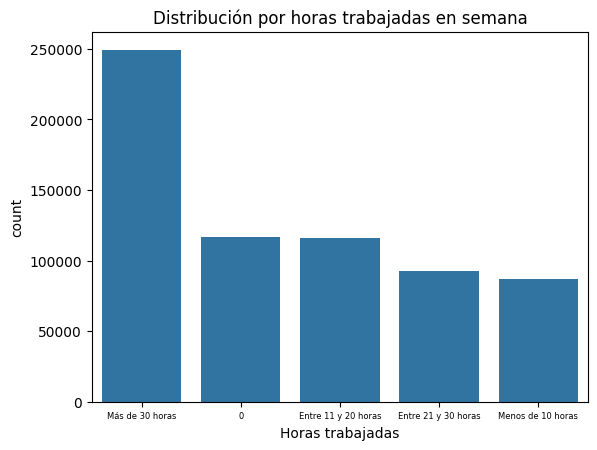

In [90]:
# Exploración por horas trabajads
print("Cantidad de estudiantes por horas trabajadas en semana:\n")
print(df["E_HORASSEMANATRABAJA"].value_counts())

sns.countplot(data=df, x="E_HORASSEMANATRABAJA", order=df["E_HORASSEMANATRABAJA"].value_counts().index).set_xlabel("Horas trabajadas")
plt.title("Distribución por horas trabajadas en semana")
plt.xticks(fontsize=6)
plt.show()


Ahora exploramos la cantidad de estudiantes por porgrama académico, más arriba notamos que como nuestros datos no estan normalizados o limpios, se detectaron 948 programas diferentes.

Cantidad de estudiantes por programa:
E_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
DEPORTE Y ACTIVIDADA FISICA                                   1
QUIMICA Y FARMACIA                                            1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES        1
COMUNICACIÓN SOCIAL Y PERIODISMO                              1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


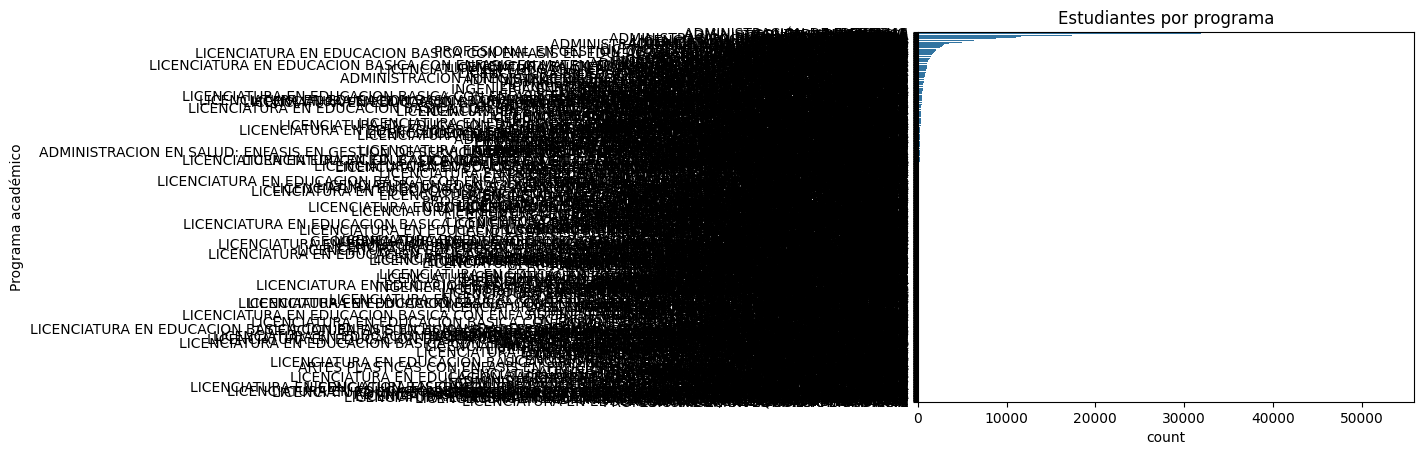

In [91]:
# Exploración por Programa
print("Cantidad de estudiantes por programa:")
print(df["E_PRGM_ACADEMICO"].value_counts())

sns.countplot(data=df, y="E_PRGM_ACADEMICO", order=df["E_PRGM_ACADEMICO"].value_counts().index).set_ylabel("Programa académico")
plt.title("Estudiantes por programa")
plt.show()

Ahora exploramos la cantidad de estudiantes por valor matrícula.

Cantidad de estudiantes por valor de matrícula:
E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: count, dtype: int64


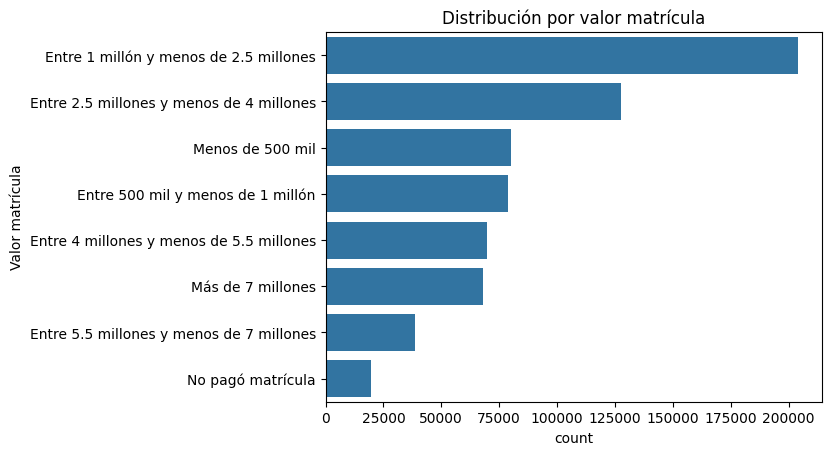

In [92]:
# Exploración por estrato
print("Cantidad de estudiantes por valor de matrícula:")
print(df["E_VALORMATRICULAUNIVERSIDAD"].value_counts())

sns.countplot(data=df, y="E_VALORMATRICULAUNIVERSIDAD", order=df["E_VALORMATRICULAUNIVERSIDAD"].value_counts().index).set_ylabel("Valor matrícula")
plt.title("Distribución por valor matrícula")
plt.show()


Ahora exploremos cuantos estudiantes tienen internet en casa.

Cantidad de estudiantes que tienen y no tienen internet:
F_TIENEINTERNET
Si    592514
No     73357
Name: count, dtype: int64


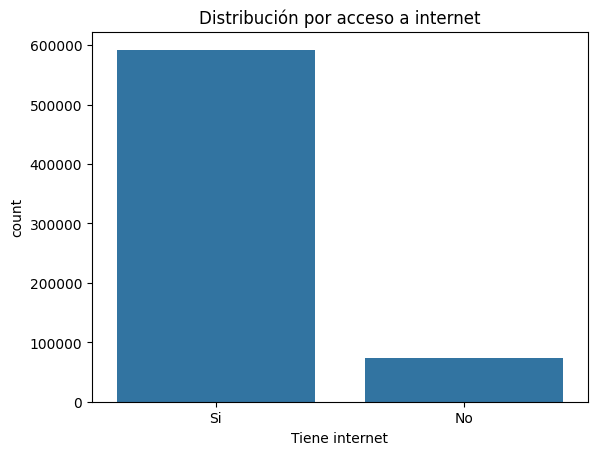

In [93]:
# Exploración por internet
print("Cantidad de estudiantes que tienen y no tienen internet:")
print(df["F_TIENEINTERNET"].value_counts())

sns.countplot(data=df, x="F_TIENEINTERNET", order=df["F_TIENEINTERNET"].value_counts().index).set_xlabel("Tiene internet")
plt.title("Distribución por acceso a internet")
plt.show()


Otro dato relevante es si el estudiante tiene o no computador.

Cantidad de estudiantes que tienen y no tienen computador:

F_TIENECOMPUTADOR
Si    597670
No     56727
Name: count, dtype: int64


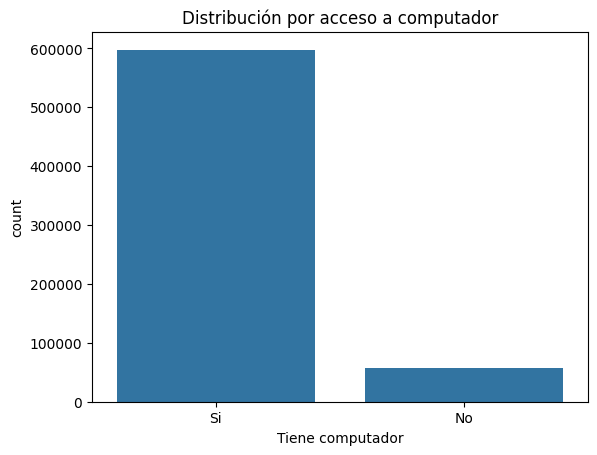

In [94]:
# Exploración por computador
print("Cantidad de estudiantes que tienen y no tienen computador:\n")
print(df["F_TIENECOMPUTADOR"].value_counts())

sns.countplot(data=df, x="F_TIENECOMPUTADOR", order=df["F_TIENECOMPUTADOR"].value_counts().index).set_xlabel("Tiene computador")
plt.title("Distribución por acceso a computador")
plt.show()


Ahora exploremos datos por parte de los padres de los estudiantes, que educación tienen y sus cantidades.

Cantidad de padres por estudio:

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


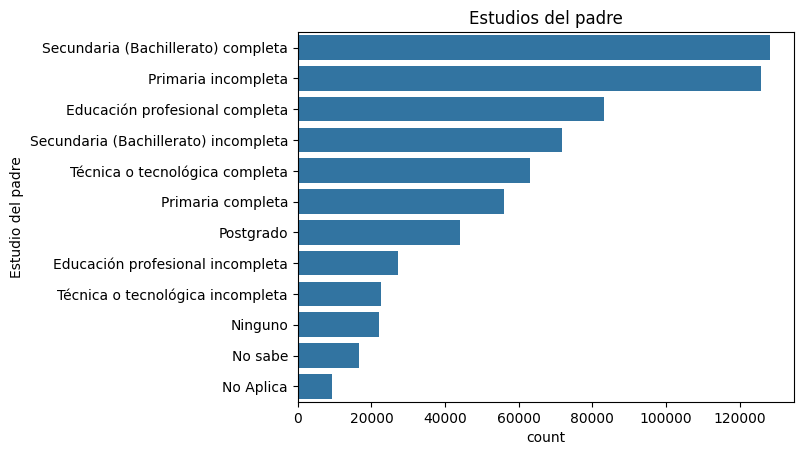

In [96]:
# Exploración de estudios padre
print("Cantidad de padres por estudio:\n")
print(df["F_EDUCACIONPADRE"].value_counts())

sns.countplot(data=df, y="F_EDUCACIONPADRE", order=df["F_EDUCACIONPADRE"].value_counts().index).set_ylabel("Estudio del padre")
plt.title("Estudios del padre")
plt.show()


Ahora exploremos los mismos datos pero ahora por parte de la madre del estudiante.

Cantidad de madres por estudio:

F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64


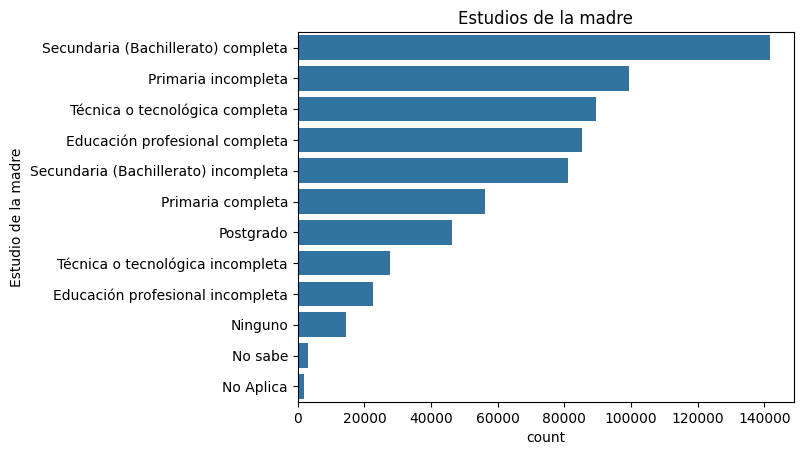

In [97]:
# Exploración de estudios padre
print("Cantidad de madres por estudio:\n")
print(df["F_EDUCACIONMADRE"].value_counts())

sns.countplot(data=df, y="F_EDUCACIONMADRE", order=df["F_EDUCACIONMADRE"].value_counts().index).set_ylabel("Estudio de la madre")
plt.title("Estudios de la madre")
plt.show()


La exploración realizada permitió verificar la correcta carga del dataset y obtener una primera aproximación a su estructura. Se identificaron aspectos clave como la cantidad de registros, el tipo de variables, la presencia de valores nulos y las distribuciones básicas de algunas columnas.
Este análisis preliminar resulta fundamental, ya que ofrece un punto de partida sólido para posteriores etapas de procesamiento, limpieza y modelado de los datos.